In [1]:
!pip install scikit-fuzzy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.4 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz

# ------------------- STEP 1: GỘP TOÀN BỘ DỮ LIỆU -------------------
input_root = '/kaggle/input/dataset-k-fold/dataset-k-fold'
all_dfs = []

for yyyymm in os.listdir(input_root):
    yyyymm_path = os.path.join(input_root, yyyymm)
    if not os.path.isdir(yyyymm_path):
        continue
    for fold in os.listdir(yyyymm_path):
        fold_path = os.path.join(yyyymm_path, fold)
        if not os.path.isdir(fold_path):
            continue

        files = [f for f in os.listdir(fold_path) if f.endswith('train.csv') or f.endswith('val.csv')]
        for f in files:
            df = pd.read_csv(os.path.join(fold_path, f))
            all_dfs.append(df)

# Gộp toàn bộ lại
if not all_dfs:
    raise ValueError("Không tìm thấy file train/val nào.")

big_df = pd.concat(all_dfs, ignore_index=True)
print("✅ Đã gộp toàn bộ dữ liệu, số dòng:", len(big_df))



✅ Đã gộp toàn bộ dữ liệu, số dòng: 2607360


In [3]:
# ------------------- STEP 2: TRUNG BÌNH THEO (ROW, COL) -------------------
def preprocess_by_location(df):
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    feature_cols = [col for col in df.columns if col not in ['DATETIME', 'ROW', 'COL']]
    grouped = df.groupby(['ROW', 'COL'])[feature_cols].mean().reset_index()
    return grouped

processed_df = preprocess_by_location(big_df)
print("✅ Đã xử lý xong, số vị trí:", len(processed_df))



✅ Đã xử lý xong, số vị trí: 334


In [4]:
# # ------------------- STEP 2: TRUNG BÌNH THEO (ROW, COL) -------------------
# def preprocess_by_location(df):
#     df['DATETIME'] = pd.to_datetime(df['DATETIME'])

#     # Lấy cột feature: loại bỏ DATETIME, ROW, COL và các cột có đuôi 'neighbor'
#     feature_cols = [
#         col for col in df.columns
#         if col not in ['DATETIME', 'ROW', 'COL'] and not col.endswith('NEIGHBOR')
#     ]

#     grouped = df.groupby(['ROW', 'COL'])[feature_cols].mean().reset_index()
#     return grouped

# processed_df = preprocess_by_location(big_df)
# print("✅ Đã xử lý xong, số vị trí:", len(processed_df))


In [5]:
processed_df.describe()

,ROW,COL,AWS,CAPE,CIN,EWSS,IE,ISOR,KX,PEV,...,SLOR_NEIGHBOR,SSHF_NEIGHBOR,TCLW_NEIGHBOR,TCW_NEIGHBOR,TCWV_NEIGHBOR,U250_NEIGHBOR,U850_NEIGHBOR,V250_NEIGHBOR,V850_NEIGHBOR,AWS_MISSING_NEIGHBOR
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0
mean,29.826347,112.619760,0.241633,0.095198,4998.658753,0.549750,-0.000036,0.463731,0.728016,0.858228,...,0.020550,0.702229,0.383664,0.591812,42.469166,12.409342,0.541932,1.951897,0.625960,0.0
std,25.711843,17.032446,0.195467,0.020801,641.817755,0.013563,0.000004,0.180822,0.035906,0.024373,...,0.013890,0.116121,0.126870,0.150750,4.916027,3.407686,0.105116,1.647681,0.157216,0.0
min,0.000000,55.000000,0.007355,0.040254,2367.781748,0.480972,-0.000064,0.000000,0.584507,0.820423,...,0.000100,0.162414,0.022775,0.031681,22.815330,-10.082678,0.230455,-3.379591,0.232097,0.0
25%,8.000000,104.000000,0.130583,0.080954,4548.725605,0.542976,-0.000039,0.370204,0.709179,0.844740,...,0.008093,0.635634,0.293188,0.509377,39.890340,9.833927,0.470740,1.317127,0.489414,0.0
50%,21.000000,113.000000,0.180111,0.093279,5099.501031,0.550439,-0.000036,0.486200,0.736857,0.853067,...,0.019673,0.730595,0.405108,0.627904,43.371691,13.155975,0.546903,2.020397,0.644492,0.0
75%,50.000000,121.750000,0.270882,0.106524,5498.655439,0.558967,-0.000034,0.596432,0.753218,0.863474,...,0.032707,0.779562,0.459062,0.692949,45.605698,14.953947,0.614688,2.731041,0.751378,0.0
max,87.000000,167.000000,1.235596,0.174865,6081.202803,0.580013,-0.000031,0.867496,0.784139,0.978329,...,0.057427,0.888932,0.720144,0.914426,62.593208,25.988707,0.823719,7.603133,0.935083,0.0


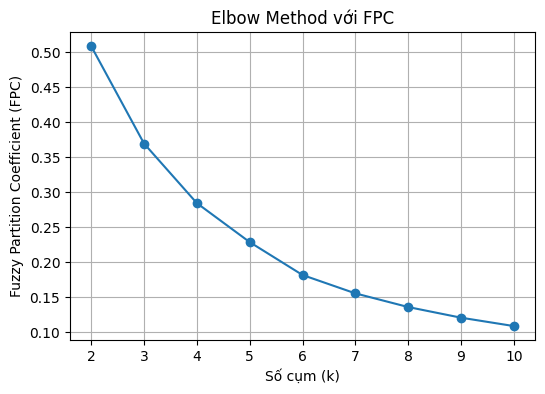

In [6]:
# ------------------- STEP 3: ELBOW METHOD -------------------
def elbow_method(data, max_clusters=10):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)

    fpcs = []
    for c in range(2, max_clusters + 1):
        cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
            scaled.T, c=c, m=2, error=0.005, maxiter=1000, init=None
        )
        fpcs.append(fpc)

    plt.figure(figsize=(6,4))
    plt.plot(range(2, max_clusters + 1), fpcs, marker='o')
    plt.xlabel("Số cụm (k)")
    plt.ylabel("Fuzzy Partition Coefficient (FPC)")
    plt.title("Elbow Method với FPC")
    plt.grid(True)
    plt.show()

    return fpcs

fpcs = elbow_method(processed_df.drop(columns=['ROW', 'COL']), max_clusters=10)

In [7]:
# Sau khi xem plot, chọn số cụm (VD: 4)
optimal_k = 4

In [8]:
# ------------------- STEP 4: PHÂN CỤM -------------------
def fuzzy_cluster_locations(df, n_clusters):
    features = df.drop(columns=['ROW', 'COL'])
    scaler = StandardScaler()
    scaled = scaler.fit_transform(features)

    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        scaled.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
    )

    labels = np.argmax(u, axis=0)
    result_df = df[['ROW', 'COL']].copy()
    result_df['CLUSTER'] = labels
    return result_df

clustered_df = fuzzy_cluster_locations(processed_df, optimal_k)

# ------------------- STEP 5: LƯU KẾT QUẢ -------------------
save_path = '/kaggle/working/fuzzy_clusters.csv'
clustered_df.to_csv(save_path, index=False)
print("✅ Đã lưu kết quả phân cụm:", save_path)


✅ Đã lưu kết quả phân cụm: /kaggle/working/fuzzy_clusters.csv


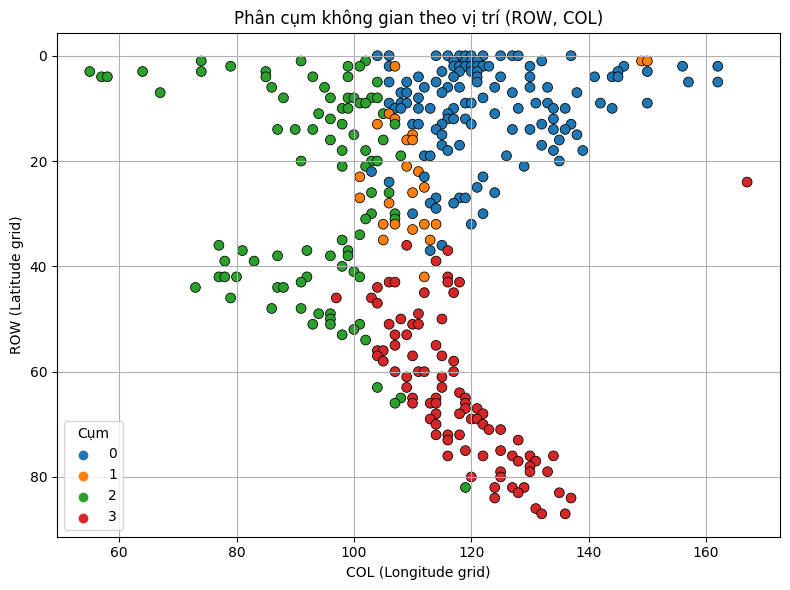

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(df_clusters):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_clusters,
        x='COL', y='ROW',
        hue='CLUSTER',
        palette='tab10',
        s=50,
        edgecolor='k'
    )
    plt.gca().invert_yaxis()  # Nếu ROW đi từ trên xuống, như ảnh lưới
    plt.title("Phân cụm không gian theo vị trí (ROW, COL)")
    plt.xlabel("COL (Longitude grid)")
    plt.ylabel("ROW (Latitude grid)")
    plt.legend(title="Cụm")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gọi hàm
plot_clusters(clustered_df)